# LOAY RASHID 2018102008

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import plotly.graph_objects as go
from skimage import io
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import linalg as LA
import numpy as np
import math
prefix = "/content/drive/MyDrive/IIITH Assignments 3-2/CV/ASGN1/"

ModuleNotFoundError: No module named 'google.colab'

In [1]:
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

In [39]:
img=cv2.imread(f"{prefix}calibration-data/calib-object.jpg")
fig = px.imshow(img)
fig.show()
print("asdf")

# 1.1


In [144]:
image_points = np.array([[1412,1780],[1664,1783],[1280,1978],[1143,2183],[997,2397],[849,2625],[688,2861]
                         ,[697,3038],[871,3143],[1788,1982],[1916,2191],[2055,2409],[2203,2639],[2359,2879]
                         ,[2351,3058],[2185,3157],[1025,3079],[1160,2856],[1289,2640],[1417,2439]
                         ,[2039,3087],[1905,2862],[1776,2648],[1658,2441]])
world_points = np.array([[0,1,1],[1,1,0],[0,2,2],[0,3,3],[0,4,4],[0,5,5],[0,6,6],[0,7,6],[0,8,5],[2,2,0]
                         ,[3,3,0],[4,4,0],[5,5,0],[6,6,0],[6,7,0],[5,8,0],[0,8,4],[0,7,3],[0,6,2],[0,5,1]
                         ,[4,8,0],[3,7,0],[2,6,0],[1,5,0]])

In [139]:
world_points_scaled1=world_points*28
world_points_scaled2=world_points*2800

In [136]:
def DLT(image_points,world_points):
    points=world_points.shape[0]
    
    transforms=[]
    for i in range(points):
        X,Y,Z = world_points[i,0],world_points[i,1],world_points[i,2]
        u,v = image_points[i,0],image_points[i,1]
        a_x = [-X,-Y,-Z,-1,0,0,0,0,u*X,u*Y,u*Z,u]
        a_y = [0,0,0,0,-X,-Y,-Z,-1,v*X,v*Y,v*Z,v]
        transforms.append(a_x)
        transforms.append(a_y)
    transforms = np.array(transforms)
    print(transforms.shape)
    U,D,V = np.linalg.svd(transforms)
    L = V[-1:]
    H = L.reshape(3,4)
    H=H/H[-1,-1]
    return H

def projection_error(P,image_points,world_points): 
    error=0
    points=world_points.shape[0]
    for i in range(points):
        p=np.append(world_points[i,:],1).reshape(4,1)
        proj=np.dot(P,p)
        proj = proj/proj[-1,-1]
        temp=np.append(image_points[i],1).reshape(3,1)
        error += LA.norm(proj - temp, ord = 2)
    return error/points

In [44]:
def norm_2(points):
    N=points.shape[0]
    mean=np.mean(np.array(points), axis = 0)
    d_hat=0
    for i in points:
        d_hat += np.sqrt((i[0] - mean[0]) ** 2 + (i[1] - mean[1]) ** 2)
    d_hat=d_hat/N

    root_2 = np.sqrt(2)
    T = np.array([[root_2 / d_hat, 0, -1 * root_2 * mean[0] / d_hat],
              [0, root_2 / d_hat, -1 * root_2 * mean[1] / d_hat],
              [0, 0 , 1]])
    one=np.ones((N,1))
    points=np.append(points, one, axis=1)
    normalized_image = np.zeros((N, 3))
    for i in range(N):
        normalized_image[i] = np.dot(T, points[i])
    return normalized_image,T

In [45]:
def norm_3(points):
    N=points.shape[0]
    mean=np.mean(np.array(points), axis = 0)      
    d_hat=0
    for i in points:
        d_hat += np.sqrt((i[0] - mean[0]) ** 2 + (i[1] - mean[1]) ** 2 + (i[2] - mean[2]) ** 2)
    d_hat=d_hat/N
    root_3 = np.sqrt(3)
    U = np.array([[root_3 / d_hat, 0, 0, -1 * root_3 * mean[0] / d_hat],
              [0, root_3 / d_hat, 0, -1 * root_3 * mean[1] / d_hat],
              [0, 0, root_3 / d_hat, -1 * root_3 * mean[2] / d_hat],
              [0, 0, 0, 1]])
    one=np.ones((N,1))
    points=np.append(points, one, axis=1)
    normalized_image = np.zeros((N, 4))
    for i in range(N):
        normalized_image[i] = np.dot(U, points[i])
    return normalized_image,U    

#### Main Experiment

In [142]:
P=DLT(image_points,world_points_scaled1)
error=projection_error(P,image_points,world_points_scaled1)
print("Projection matrix:", P)
print("Error:", error)

print("\n")

P=DLT(image_points,world_points_scaled2)
error=projection_error(P,image_points,world_points_scaled2)
print("Projection matrix:", P)
print("Error:", error)

(48, 12)
Projection matrix: [[ 2.48733060e+00  5.38103521e-01 -6.12895155e+00  1.53815233e+03]
 [-1.18916089e+00  6.58361582e+00 -1.25096992e+00  1.59271350e+03]
 [-1.12791456e-03  3.42040283e-04 -1.11722576e-03  1.00000000e+00]]
Error: 1.8135593409609434


(48, 12)
Projection matrix: [[ 2.48733065e-02  5.38103451e-03 -6.12895147e-02  1.53815233e+03]
 [-1.18916077e-02  6.58361567e-02 -1.25096976e-02  1.59271350e+03]
 [-1.12791452e-05  3.42040237e-06 -1.11722571e-05  1.00000000e+00]]
Error: 1.813559358364209


In [143]:
image_points_normalised,T=norm_2(image_points)
world_points_normalised_1,U=norm_3(world_points_scaled1)
P_normalised=DLT(image_points_normalised[:,:2],world_points_normalised_1[:,:3])
print("P_normalised", P_normalised)

Tinv=np.linalg.inv(T)
print("P Denormalised:", np.dot(np.dot(Tinv, P_normalised), U))
print('error:', projection_error(P_Denormalised,image_points,world_points_scaled1))

print("\n")

image_points_normalised,T=norm_2(image_points)
world_points_normalised_2,U=norm_3(world_points_scaled2)
P_normalised=DLT(image_points_normalised[:,:2],world_points_normalised_2[:,:3])
print("P_normalised", P_normalised)

Tinv=np.linalg.inv(T)
print("P Denormalised:", np.dot(np.dot(Tinv, P_normalised), U))
print('error:', projection_error(P_Denormalised,image_points,world_points_scaled2))

(48, 12)
P_normalised [[ 5.82290600e-01  2.03439512e-03 -6.10730002e-01 -2.48534462e-04]
 [ 2.39347108e-01  7.87387802e-01  2.26977607e-01 -1.77355650e-02]
 [-6.95405609e-02  2.11239109e-02 -6.88849659e-02  1.00000000e+00]]
P Denormalised: [[ 2.64880468e+00  5.73464911e-01 -6.52310366e+00  1.63706012e+03]
 [-1.26406178e+00  7.00882582e+00 -1.33004040e+00  1.69504240e+03]
 [-1.19995312e-03  3.64502422e-04 -1.18864054e-03  1.06430974e+00]]
error: 1.8118149945707556


(48, 12)
P_normalised [[ 5.82290600e-01  2.03439512e-03 -6.10730002e-01 -2.48534462e-04]
 [ 2.39347108e-01  7.87387802e-01  2.26977607e-01 -1.77355650e-02]
 [-6.95405609e-02  2.11239109e-02 -6.88849659e-02  1.00000000e+00]]
P Denormalised: [[ 2.64880468e-02  5.73464911e-03 -6.52310366e-02  1.63706012e+03]
 [-1.26406178e-02  7.00882582e-02 -1.33004040e-02  1.69504240e+03]
 [-1.19995312e-05  3.64502422e-06 -1.18864054e-05  1.06430974e+00]]
error: 41491.676238329346


#1.2

In [79]:
def Decomposition(P):
    H = P[0:3,0:3]
    H_inv = np.linalg.pinv(H)
    q, r = np.linalg.qr(H_inv)
    
    K = np.linalg.inv(r)
    K = K/K[-1,-1]
    R=np.linalg.inv(q)
    h = P[:,-1]
    projection_center = -1*np.matmul(H_inv,h)
    return K, R, projection_center

In [80]:
K, R, projection_center=Decomposition(P)
print ("Camera matrix:",K)
print ("Rotation:",R)
print ("Projection Center",projection_center)

Camera matrix: [[3.75904274e+03 2.58639161e+01 1.60234221e+03]
 [0.00000000e+00 3.73941130e+03 1.89231612e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rotation: [[-0.70242734  0.00835774  0.71170639]
 [-0.15564638 -0.97753316 -0.1421377 ]
 [ 0.69452864 -0.21061593  0.68794687]]
Projection Center [442.49172328 -81.54791885 423.38306765]


In [120]:
rzpi = [[-1,0,0],[0,-1,0],[0,0,1]]
K1= np.matmul(K,rzpi)
R1 = np.matmul(R,rzpi)
print ("Transformed matrix:",K1)
print ("Transformed Rotation:",R1)

Transformed matrix: [[-3.75904274e+03 -2.58639161e+01  1.60234221e+03]
 [ 0.00000000e+00 -3.73941130e+03  1.89231612e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformed Rotation: [[-0.99864919 -0.00378509 -0.05182157]
 [ 0.00309758 -0.99990621  0.01334092]
 [-0.05186721  0.01316238  0.99856725]]


#1.3


In [89]:
def RANSAC(image,world):
    threshold=10
    iters=100
    sample_size=6
    max_inliers=0
    P_final=np.zeros((3,4))
    best_error=0
    for i in range(iters):
        samples = set()
        while len(samples) < sample_size:
            samples.add(np.random.randint(1, world.shape[0]))
        samples = list(samples)
        P = DLT(image[samples],world[samples])
        inliers=0
        err_sum=0
        for i in np.arange(world.shape[0]):
            p=np.append(world[i,:],1).reshape(4,1)
            proj=np.dot(P,p)
            proj = proj/proj[-1,-1]
            temp=np.append(image[i],1).reshape(3,1)
            err = np.linalg.norm(proj - temp)
            err_sum+=err
            if(err<threshold):
                inliers+=1
        if(inliers>max_inliers):
            max_inliers=inliers
            P_final=P
            best_error=err_sum/world.shape[0]
    return P_final,best_error,inliers

In [ ]:
P, error, inliers=RANSAC(image_points,world_points_scale_1)

In [123]:
print("P:", P)
print("error:", error)
#print("inliers:", inliers)

P: [[ 2.50450422e+00  5.23548200e-01 -6.10818592e+00  1.53425308e+03]
 [-1.18937597e+00  6.52063273e+00 -1.31959146e+00  1.59815408e+03]
 [-1.12318406e-03  3.27072878e-04 -1.13581395e-03  1.00000000e+00]]
error: 2.2215138080459114


Prob of success of ransac against iterations


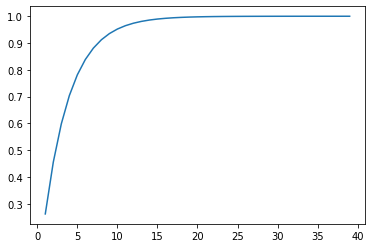

In [94]:
prob=[]
iter=40
for T in range(1,iter):
  prob.append(1-np.exp(T*np.log(1-pow(0.8,6))))
prob=np.array(prob)
print("Prob of success of ransac against iterations")
plt.plot(np.arange(1,iter),prob)
plt.show()

The result of DLT algorithm for computing 2D homographies depends on the coordinate frame in which points is expressed. The result is not invariant to similarity transformations of the image. This suggests that there are some coordinate systems ehich are way better than others for computing a 2D homography. Like the method of normalization which consists of translation and scaling of image coordinates. Apart from improved accuracy of results (as we can see from above) , data normalization provides another benefit, i.e. an algorithm that incorporates an initial data normalization step will be invariant with respect to arbitrary choices of the scale and coordinate origin . This is because the normalization step undoes the effect of coordinate changes , by effectively choosing a canonical coordinate frame for the measurement of data. Algebirac minimization is carried out in a fixed canonical frame , and the DLT algorithm is in practice invariant to similarity tranformations.

# 2




In [100]:
x,y=np.meshgrid(range(8),range(6))
world_points=np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)))).astype(np.float32)
_3d_points=[]
_2d_points=[]

image_list = []
start = 5456
for i in np.arange(15):
    image_list.append(cv2.imread(f"{prefix}calibration-data/"+"IMG_" + str(start+i) + ".JPG"))

In [102]:
for image in image_list:
    ret, corners = cv2.findChessboardCorners(image, (8,6))
    if ret: #add points only if checkerboard was correctly detected:
        _2d_points.append(corners) 
        _3d_points.append(world_points) 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points, _2d_points, (image_list[-1].shape[1],image_list[-1].shape[0]), None, None)
print('Reprojection Error:', ret)
print ('Camera Matrix:',mtx)

Reprojection Error: 2.4810222497615952
Camera Matrix: [[1.36634816e+04 0.00000000e+00 3.33651275e+03]
 [0.00000000e+00 1.36813888e+04 1.49657985e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


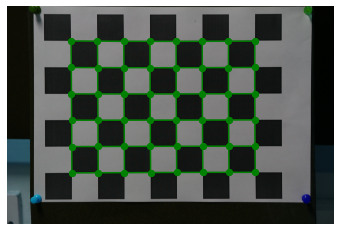

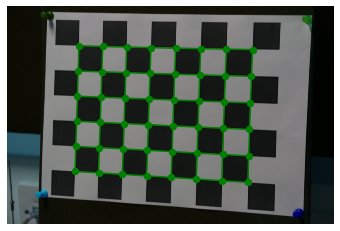

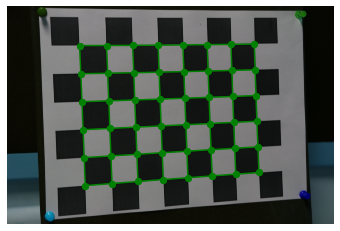

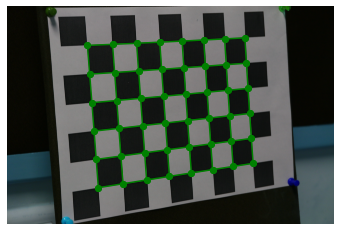

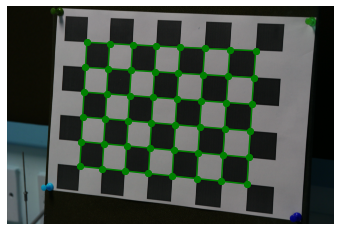

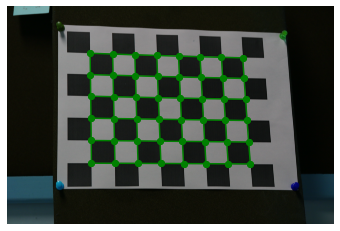

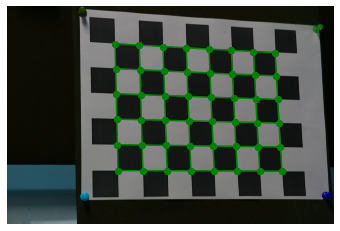

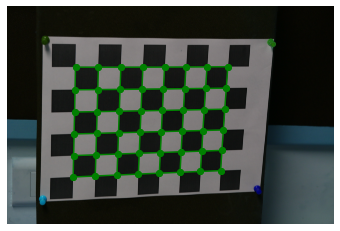

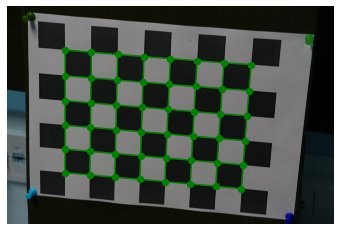

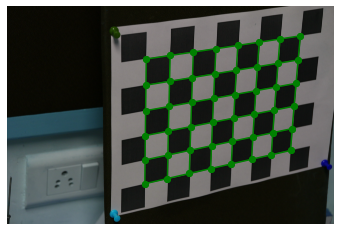

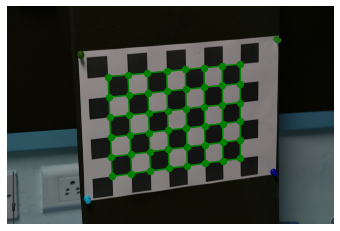

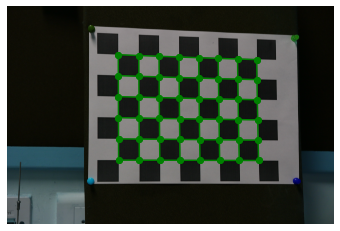

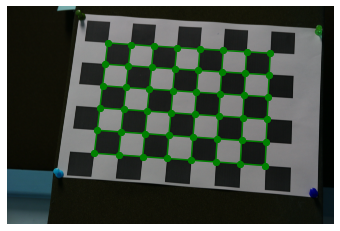

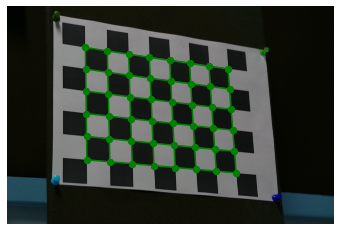

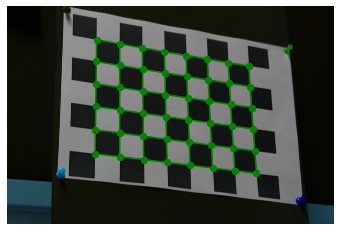

In [110]:
projected_points = []
for i in range(len(_3d_points)):
    pred2d, _ = cv2.projectPoints(_3d_points[i], rvecs[i], tvecs[i], mtx, dist)
    projected_points.append(pred2d)
projected_points = np.asarray(projected_points)
projected_points = projected_points.reshape((-1, 2))
# print(projected_points.shape)

c = 0
for img in image_list:
    plt.cla()
    plt.clf()
    x_idx = c
    for k in range(6):
        xs = []
        ys = []
        for l in range(8):
            xs.append(projected_points[x_idx][0])
            ys.append(projected_points[x_idx][1])
            x_idx = x_idx + 1
        plt.plot(xs, ys, 'go-')
    y_st_idx = c
    c = c + 48
    for k in range(8):
        xs = []
        ys = []
        idx = y_st_idx + k
        for l in range(6):
            xs.append(projected_points[idx][0])
            ys.append(projected_points[idx][1])
            idx = idx + 8
        plt.plot(xs, ys, 'go-')
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    

#3

In [146]:
im = cv2.imread('/content/istock_000018725307small_custom-a6873e2736f5411777df52a3be2b37e76a66f2e8-s800-c85.jpg')
world_pts = [[0,0,0],
             [1,0,0],
             [2,0,0],
             [3,0,0],
             [0,1,0],
             [0,2,0],
             [0,3,0],
             [0,0,1],
             [0,0,2],
             [0,0,3],
             [1,1,0],
             [1,0,1],
             [0,1,1],
             [0,2,1],
             [1,2,0],
             [2,0,1],
             [1,0,2],
             [0,1,2],
             [2,2,0],
             [0,2,2],            
            ]
img_pts = [[303, 190], [200,163], [102,134], [28,120], [380,160], [452,128], [507,106], [297,307], [314,430], [303,533], [279,129], [205,283], [275,272], [449,229], [182,102], [110,243], [200,400], [374,387], [268,78], [443,348]]

In [150]:
image_points = np.array(image_points)
world_points = np.array(world_points)
P = DLT(image_points,world_points)
err = projection_error(p,image_points,world_points)
print("projection matrix:", P)
print("error: " , err)

(48, 12)
projection matrix: [[ 6.96445808e+01  1.50682922e+01 -1.71612205e+02  1.53815206e+03]
 [-3.32982192e+01  1.84343881e+02 -3.50297161e+01  1.59271236e+03]
 [-3.15822611e-02  9.57801717e-03 -3.12832722e-02  1.00000000e+00]]
error:  2673.543682556228


In [ ]:
P,error,__ = RANSAC(image_points,world_points)

In [155]:
print("Error:", error)
print("P:" , P)

Error: 2.4354283319734136
P: [[ 7.01198743e+01  1.43567518e+01 -1.70941745e+02  1.54103041e+03]
 [-3.24461925e+01  1.84433987e+02 -3.37401429e+01  1.59190525e+03]
 [-3.12554093e-02  9.49692658e-03 -3.07430435e-02  1.00000000e+00]]
